<a href="https://colab.research.google.com/github/eseblanco/CiDatTecMod2/blob/main/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import kagglehub
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
%matplotlib inline

#https://www.kaggle.com/datasets/diegorojasdiaz/123-emergency-calls-in-bogota
# Download latest version
path = kagglehub.dataset_download("diegorojasdiaz/123-emergency-calls-in-bogota")

print("\n Path to dataset files:\n\n", path)



100%|██████████| 4.59M/4.59M [00:00<00:00, 126MB/s]

Extracting files...



 Path to dataset files:

 /root/.cache/kagglehub/datasets/diegorojasdiaz/123-emergency-calls-in-bogota/versions/4


Carga de Archivos

In [4]:
emergencia_data = pd.read_csv(path+"/clean_df_123.csv")

emergencia_data.head()



/tmp/ipython-input-183641980.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  emergencia_data = pd.read_csv(path+"/clean_df_123.csv")


,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,CLASIFICACION_FINAL
0,2019-01-01 00:04:37,11,Suba,NaN,NaN,Norte,Lesiones personales,Alta,Cancelado
1,2019-01-01 00:07:41,3,Santa Fe,51.0,Femenino,Norte,Dolor torácico,Alta,Traslado
2,2019-01-01 00:07:46,10,Engativá,NaN,NaN,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Falsa Alarma
3,2019-01-01 00:08:06,16,Puente Aranda,NaN,NaN,Sur,Accidente de tránsito con heridos/muertos,Alta,Cancelado
4,2019-01-01 00:10:26,15,Antonio Nariño,NaN,NaN,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Cancelado


In [28]:
# Contar la cantidad de valores NaN en la columna 'EDAD'
emergencia_data['EDAD'] = pd.to_numeric(emergencia_data['EDAD'], errors='coerce')
nan_count = emergencia_data['EDAD'].isna().sum()
print(f"Cantidad total de lineas ': {len(emergencia_data)}  \n")
print(f"Cantidad de valores NaN en la columna 'EDAD': {nan_count}  \n")
print(f"Cantidad de valores en la columna 'EDAD': {len(emergencia_data) - nan_count}  \n")
print(f"Porcentaje de valores en la columna 'EDAD': { nan_count / len(emergencia_data) *100 }  \n")
print(f"Valor maximo es {emergencia_data['EDAD'].max()} \n")
print(f"Valor mínimo es {emergencia_data['EDAD'].min()} \n ")
print(f"Media de la EDAD  {emergencia_data['EDAD'].mean()} \n")
print(f"Mediana de la EDAD {emergencia_data['EDAD'].median()} \n")
print(f"Moda de la EDAD {emergencia_data['EDAD'].mode()[0]} \n")
print(f"Desviación estándar de la EDAD {emergencia_data['EDAD'].std()} \n")
print(f"Percentil 25 de la EDAD {emergencia_data['EDAD'].quantile(0.25)} \n")
print(f"Percentil 75 de la EDAD {emergencia_data['EDAD'].quantile(0.75)} \n")



Cantidad total de lineas ': 242241  

Cantidad de valores NaN en la columna 'EDAD': 112310  

Cantidad de valores en la columna 'EDAD': 129931  

Porcentaje de valores en la columna 'EDAD': 46.362919571831355  

Valor maximo es 99.0 

Valor mínimo es 0.0 
 
Media de la EDAD  45.76640678513981 

Mediana de la EDAD 40.0 



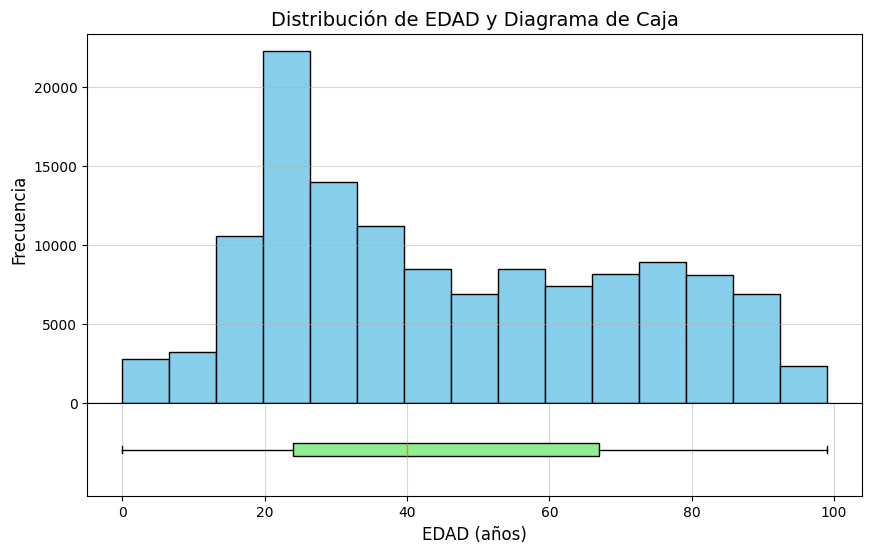

In [5]:
#Grafico de Edad


#
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]} # Proporción de alturas [4 (hist), 1 (box)]
)

# 2. Eliminar el espacio vertical entre los subplots
fig.subplots_adjust(hspace=0)

# --- Histograma de EDAD (Superior) ---
# Se utiliza ax_hist para el histograma
ax_hist.hist(
    emergencia_data['EDAD'].dropna(),
    bins=15,
    color='skyblue',
    edgecolor='black'
)
ax_hist.set_title('Distribución de EDAD y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)

# Ocultar las etiquetas del eje X en el histograma para evitar redundancia
ax_hist.tick_params(axis="x", labelbottom=False)

# --- Box Plot (Diagrama de Caja) de EDAD (Inferior) ---
# Se utiliza ax_box para el box plot
ax_box.boxplot(
    emergencia_data['EDAD'].dropna(),
    vert=False, # Horizontal
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5) # Estilo de Outliers
)
ax_box.set_xlabel('EDAD (años)', fontsize=12)
ax_box.set_yticks([]) # Eliminar la etiqueta de Y para el box plot
ax_box.grid(axis='x', alpha=0.5)

plt.show()



In [6]:
# Contar la cantidad de valores NaN en la columna 'Genero'

emergencia_data['GENERO'] = emergencia_data['GENERO'].replace('', np.nan)

nan_count_genero = emergencia_data['GENERO'].isna().sum()

print(f"Cantidad de valores NaN en la columna 'GENERO': {nan_count_genero} \n")
print(f"Cantidad de valores en la columna 'GENERO': {len(emergencia_data) - nan_count_genero}  \n")

print(f"Porcentaje de valores en la columna 'GENERO': {nan_count_genero / len(emergencia_data) *100 }  \n")

Cantidad de valores NaN en la columna 'GENERO': 112252 

Cantidad de valores en la columna 'GENERO': 129989  

Porcentaje de valores en la columna 'GENERO': 46.338976473842166  



/tmp/ipython-input-3498657134.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emergencia_data['GENERO'].replace(['', ' '], np.nan, inplace=True)


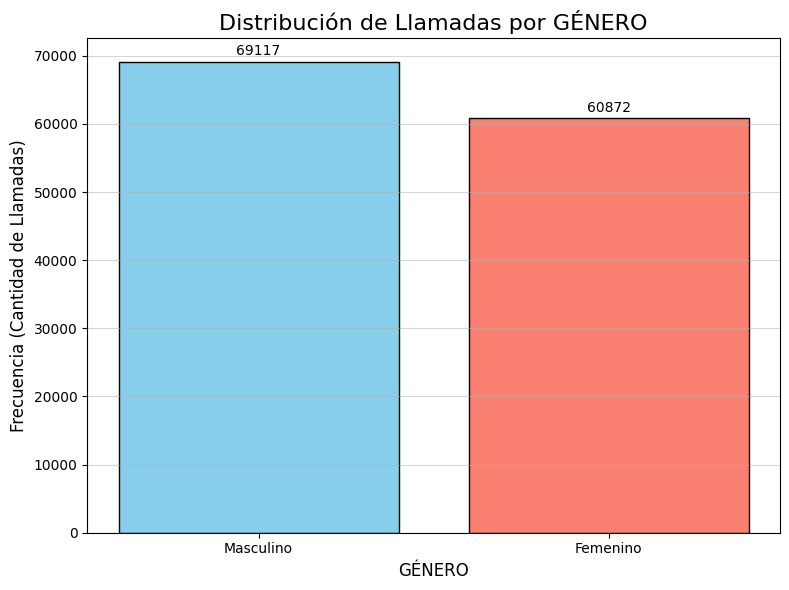

In [9]:
# histograma por genero.

emergencia_data['GENERO'].replace(['', ' '], np.nan, inplace=True)

# 2. Contar las ocurrencias de cada valor único en 'GENERO'
gender_counts = emergencia_data['GENERO'].value_counts()

# 3. Generar el gráfico de barras
plt.figure(figsize=(8, 6))

bars = plt.bar(
    gender_counts.index,
    gender_counts.values,
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)

plt.title('Distribución de Llamadas por GÉNERO', fontsize=16)
plt.xlabel('GÉNERO', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Llamadas)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Añadir etiquetas de conteo
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('gender_distribution_bar_chart.png')
plt.show()

In [7]:
# Cantidad de incidentes
cantidad_tipos_incidentes = emergencia_data['TIPO_INCIDENTE'].nunique()

print(f"Cantidad de tipos de incidentes sin repeticiones: {cantidad_tipos_incidentes} \n ")
print(emergencia_data['TIPO_INCIDENTE'].unique())

print("\n\n")

# Cantidad estados de prioridad

cantidad_PRIORIDAD = emergencia_data['PRIORIDAD'].nunique()

print(f"Cantidad de tipos de prioridad sin repeticiones: {cantidad_PRIORIDAD} \n ")
print(emergencia_data['PRIORIDAD'].unique())

print("\n\n")


# Cantidad de clasificacion final

cantidad_CLASIFICACION = emergencia_data['CLASIFICACION_FINAL'].nunique()

print(f"Cantidad de tipos de clasificacion final  sin repeticiones: {cantidad_CLASIFICACION} \n ")
print(emergencia_data['CLASIFICACION_FINAL'].unique())

print("\n\n")


Cantidad de tipos de incidentes sin repeticiones: 81 
 
['Lesiones personales' 'Dolor torácico'
 'Inconsciente/paro cardiorrespiratorio'
 'Accidente de tránsito con heridos/muertos' 'Herido con pólvora'
 'Intento de suicidio' 'Disparos' 'Enfermo' 'Heridos'
 'Dificultad respiratoria' 'Caída' 'Trastorno mental' 'Intoxicaciones'
 'Convulsiones' 'Incidente rescate acuático' 'Accidente cerebro vascular'
 'Quemaduras' 'Síntomas gastrointestinales' 'Riña' 'Embriaguez'
 'Ideas de suicidio' 'Incendio estructural'
 'Patología gineco - obstétrica' 'Incendio forestal' 'Muerte natural'
 'Violencia sexual' 'Verificar situación' 'Abrir domicilio'
 'Sangrado vaginal' 'Incendio vehicular' 'Accidente tránsito simple'
 'Rescates' 'Persona pidiendo auxilio' 'Habitante de la calle' nan
 'Persona tendida en la vía' 'Electrocución / rescate'
 'Fuga de gas natural o propano' 'Solicitud apoyo / desacato'
 'Elemento caído y/o en peligro de caer.' 'Animal peligroso'
 'Atraco / hurto en proces' 'Muerto' 'Explosió

In [8]:
#Agrupar por 'TIPO_INCIDENTE' y calcular la mediana  por grupo.
mediana_edad_por_accidente = emergencia_data.groupby('TIPO_INCIDENTE')['EDAD'].median().sort_values(ascending=False)

#Agrupar por 'TIPO_INCIDENTE' y calcular la cantidad total de incidentes.
cantidad_por_accidente = emergencia_data.groupby('TIPO_INCIDENTE')['EDAD'].count().sort_values(ascending=False)
# 3. Mostrar el resultado completo
print("--- Edades mediana por Tipo de Incidente (Ordenadas de Mayor a Menor) ---")
print(mediana_edad_por_accidente.to_string())

print("\n--- Cantidad de Registros por Tipo de Incidente (Ordenadas de Mayor a Menor) ---")
print(cantidad_por_accidente.to_string())

--- Edades mediana por Tipo de Incidente (Ordenadas de Mayor a Menor) ---
TIPO_INCIDENTE
Rapto / secuestro                            84.0
Menor o persona abandonada                   75.0
Abrir domicilio                              74.0
Fallecido                                    72.0
Evento respiratorio                          72.0
Muerte natural                               72.0
Accidente cerebro vascular (acv)             70.0
Dificultad respiratoria                      69.0
Accidente cerebro vascular                   68.0
Enfermo                                      61.0
Síntomas gastrointestinales                  61.0
Dolor torácico                               59.0
Muerto                                       59.0
Inconsciente / paro cardiorespiratorio       58.0
Inconsciente/paro cardiorrespiratorio        56.0
Persona pidiendo auxilio                     54.0
Vehiculo hurtado                             53.0
Caída de altura                              52.0
Habitante d